# Visualización de datos con Matplotlib y Mayavi

### Primero un paseo por matplotlib ....

In [20]:
from IPython.display import IFrame
IFrame('http://matplotlib.org/gallery.html', width=900, height=350)

In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#### Plots en 2D

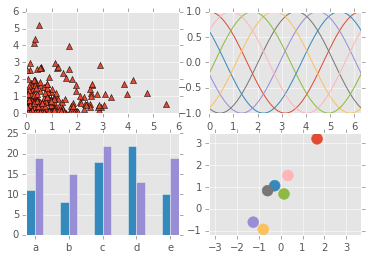

In [21]:
plt.style.use('ggplot')

fig, axes = plt.subplots(ncols=2, nrows=2)
ax1, ax2, ax3, ax4 = axes.ravel()

#### scatter plot
x, y = np.random.exponential(size=(2, 200))
ax1.plot(x, y, '^')

#### line plot
L = 2*np.pi
x = np.linspace(0, L)
ncolors = len(plt.rcParams['axes.color_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)
for s in shift:
    ax2.plot(x, np.cos(x + s), '-')
ax2.margins(0)

#### bar graphs
x = np.arange(5)
y1, y2 = np.random.randint(1, 25, size=(2, 5))
width = 0.25
ax3.bar(x, y1, width)
ax3.bar(x + width, y2, width, color=plt.rcParams['axes.color_cycle'][2])
ax3.set_xticks(x + width)
ax3.set_xticklabels(['a', 'b', 'c', 'd', 'e'])

### patches
for i, color in enumerate(plt.rcParams['axes.color_cycle']):
    xy = np.random.normal(size=2)
    ax4.add_patch(plt.Circle(xy, radius=0.25, color=color))
ax4.axis('equal')
ax4.margins(0)

plt.show()

#### Ahora vamos a tomar una superficie generada con fBM en un archivo .xyz y cargarla con pandas ..

In [22]:
import pandas as pd
df = pd.read_csv('data/sup_brown.xyz', header=None, sep=' ', decimal=',', names=['x', 'y', 'z', 'n'])
df = df[['x', 'y', 'z']]
df

,x,y,z
0,0,0,-0.325890
1,1,0,2.668167
2,2,0,5.502945
3,3,0,6.749977
4,4,0,9.156097
5,5,0,8.967857
6,6,0,9.027817
7,7,0,1.025154
8,8,0,-2.061264
9,9,0,0.056580


#### Tomamos las variables con las que queremos trabajar ..

In [23]:
X_bmf = df['x'].values
Y_bmf = df['y'].values
Z_bmf = df['z'].values

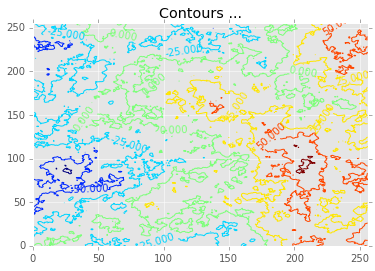

In [24]:
from scipy.interpolate import griddata

xi = np.linspace(X_bmf.min(),X_bmf.max(),500)
yi = np.linspace(Y_bmf.min(),Y_bmf.max(),500)
zi = griddata((X_bmf, Y_bmf), Z_bmf, (xi[None,:], yi[:,None]), method='linear')
xig, yig = np.meshgrid(xi, yi)
CS = plt.contour(xig, yig, zi)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Contours ...')
plt.show()

#### Plots en 3D ..

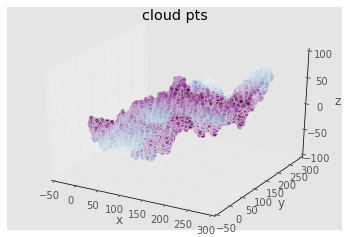

In [25]:
# % matplotlib inline
threedee = plt.figure().gca(projection='3d')
threedee.set_title("cloud pts")
threedee.scatter(X_bmf, Y_bmf, Z_bmf, c=np.abs(Z_bmf), cmap= cm.BuPu_r)
threedee.set_xlabel('x')
threedee.set_ylabel('y')
threedee.set_zlabel('z')
plt.show()

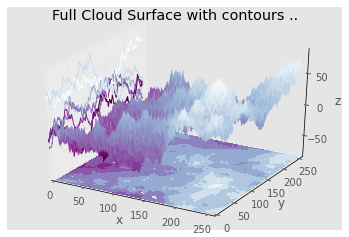

In [26]:
threedee = plt.figure().gca(projection='3d')
threedee.set_title("Full Cloud Surface with contours ..")

xi = np.linspace(X_bmf.min(),X_bmf.max(),500)
yi = np.linspace(Y_bmf.min(),Y_bmf.max(),500)
zi = griddata((X_bmf, Y_bmf), Z_bmf, (xi[None,:], yi[:,None]), method='linear')
threedee.set_xlabel('x')
threedee.set_ylabel('y')
threedee.set_zlabel('z')
xig, yig = np.meshgrid(xi, yi)
surf = threedee.plot_surface(xig, yig, zi, linewidth=0, cmap= cm.BuPu_r)
count_x = threedee.contour(xig, yig, zi, zdir='x', offset=-10, cmap=cm.BuPu_r)
count_z = threedee.contourf(xig, yig, zi, zdir='z', offset=-85, cmap=cm.BuPu_r)
threedee.set_xlabel('x')
threedee.set_ylabel('y')
threedee.set_zlabel('z')

plt.show()

#### Ahora supongamos que queremos analizar estos datos en 2D ..

In [27]:
import numpy.polynomial.polynomial as poly

x_new = np.linspace(X_bmf[:300].min(), X_bmf[:300].max(), 300)
coefs = poly.polyfit(X_bmf[:300],Z_bmf[:300], 20)
ffit = poly.polyval(x_new, coefs)

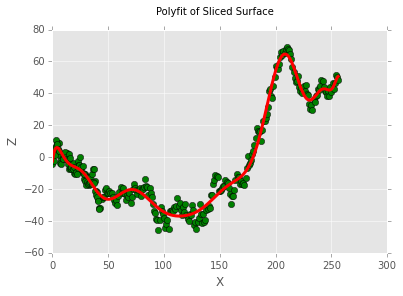

In [28]:
fig = plt.figure()
fig.suptitle('Polyfit of Sliced Surface')
ax = fig.add_subplot(1, 1, 1)
l = ax.plot(X_bmf[:300],Z_bmf[:300], 'go',x_new, ffit, 'r-', linewidth=3)
ax.grid(True)
ax.set_ylabel('Z')
ax.set_xlabel('X')

plt.show()

### Veamos alguna animación para saber que existen ...

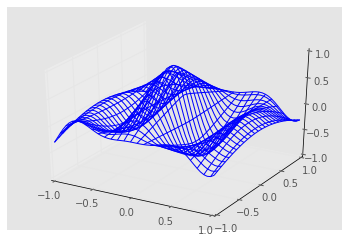

In [29]:
import time

def generate(X, Y, phi):
    R = 1 - np.sqrt(X**2 + Y**2)
    return np.cos(2 * np.pi * X + phi) * R

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = np.linspace(-1, 1, 50)
ys = np.linspace(-1, 1, 50)
X, Y = np.meshgrid(xs, ys)
Z = generate(X, Y, 0.0)

wframe = None
tstart = time.time()
for phi in np.linspace(0, 360 / 2 / np.pi, 100):

    oldcol = wframe

    Z = generate(X, Y, phi)
    wframe = ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2)

    # Remove old line collection before drawing
    if oldcol is not None:
        ax.collections.remove(oldcol)

    plt.pause(.001)


### Analizando varias dimensiones ...

In [30]:
cern_data = pd.read_csv("data/cern_data/training.csv") #, nrows=1000)
cern_data

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.000,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.000,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.000,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.000,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.000,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.000,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,6.245333,b
5,100005,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,...,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414,b
6,100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,...,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653,s
7,100007,154.916,10.418,94.714,29.169,-999.000,-999.000,-999.000,2.897,1.526,...,1,30.638,-0.715,-1.724,-999.000,-999.000,-999.000,30.638,0.018636,s
8,100008,105.594,50.559,100.989,4.288,-999.000,-999.000,-999.000,2.904,4.288,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,5.296003,b
9,100009,128.053,88.941,69.272,193.392,-999.000,-999.000,-999.000,1.609,28.859,...,1,167.735,-2.767,-2.514,-999.000,-999.000,-999.000,167.735,0.001502,s


In [15]:
interest = cern_data.columns[25:]
interest

Index([u'PRI_jet_leading_eta', u'PRI_jet_leading_phi',
       u'PRI_jet_subleading_pt', u'PRI_jet_subleading_eta',
       u'PRI_jet_subleading_phi', u'PRI_jet_all_pt', u'Weight', u'Label'],
      dtype='object')

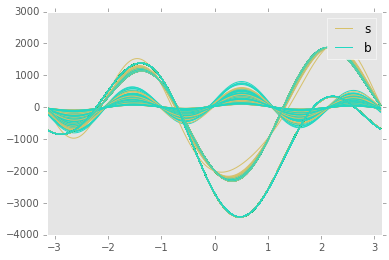

In [18]:
%matplotlib inline
from pandas.tools.plotting import andrews_curves
andrews_curves(cern_data[interest], cern_data.columns[-1])

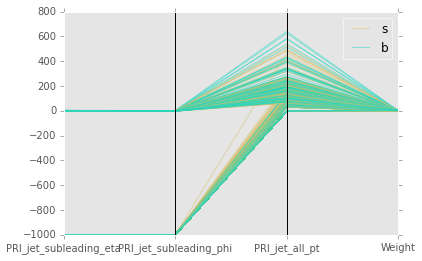

In [19]:
from pandas.tools.plotting import parallel_coordinates

parallel_coordinates(cern_data[interest[3:]], 'Label', alpha=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ce480b390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f2ce0824810>]], dtype=object)

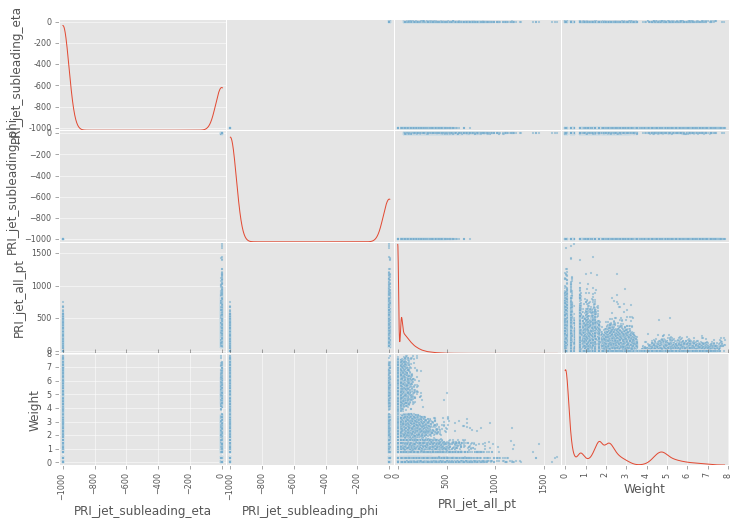

In [21]:
pd.scatter_matrix(cern_data.loc[:,interest[3:-1]], figsize=(12,8), diagonal='kde')

## Ahora un poco de MayaVi ...

In [22]:
from IPython.display import IFrame
IFrame('http://docs.enthought.com/mayavi/mayavi/auto/examples.html', width=900, height=350)

#### Cargamos un archivo .pcd tomado con la biblioteca pcl (c++) desde la kinect con pandas

In [31]:
import pandas as pd
df = pd.read_csv('data/cloudfilter.pcd', skiprows=11, sep=' ', header=None, names=['x', 'y', 'z'])
df_not_nan = df.dropna()
df_not_nan

,x,y,z
25484,0.045729,-0.635119,1.843328
25485,0.049297,-0.635008,1.843441
25486,0.052821,-0.634975,1.843478
25487,0.056309,-0.635033,1.843412
25488,0.059734,-0.635240,1.843181
25489,0.063205,-0.635349,1.843055
25490,0.066692,-0.635415,1.842979
25965,0.045144,-0.633134,1.841568
25966,0.048687,-0.633044,1.841672
25967,0.053190,-0.626357,1.835405


In [24]:
X = df_not_nan['x']
Y = df_not_nan['y']
Z = df_not_nan['z']

#### Ahora vamos a graficar con puntos la nube x,y,z tomada del archivo

In [25]:
from mayavi import mlab
mlab.figure(1, fgcolor=(0, 0, 0), bgcolor=(1, 1, 1))

pts = mlab.points3d(X, Y, Z, Z, scale_mode='none', scale_factor=0.02)

mlab.view(90)
mlab.show()

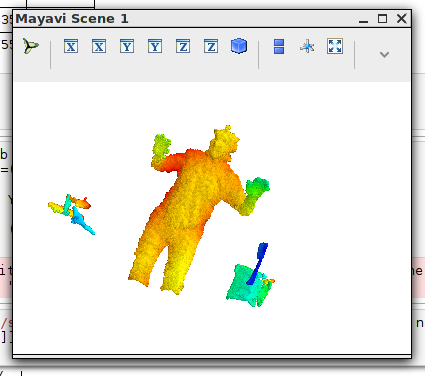

In [1]:
from IPython.display import Image
Image(filename='images/mayavi_pcd.png') 

#### Al ser una superficie vamos a querer ver mas que solo los puntos distribuidos ... que se pueden ver en el gráfico de abajo

In [ ]:
from mayavi import mlab
import numpy as np

mlab.clf()
fig3d = mlab.figure(1, fgcolor=(0, 0, 0), bgcolor=(1, 1, 1))

# Visualize the points
pts = mlab.points3d(X_bmf, Y_bmf, Z_bmf, Z_bmf, scale_mode='none', scale_factor=0.02)

# Create and visualize the mesh
mesh = mlab.pipeline.delaunay2d(pts)
surf = mlab.pipeline.surface(mesh, colormap='Spectral')

mlab.show()

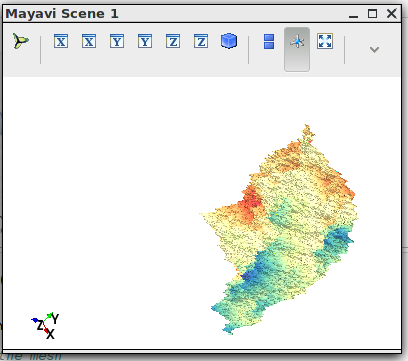

In [1]:
from IPython.display import Image
Image(filename='images/brown_surface.png') 

## Ahora interactuemos un poco mas con nuestros datos ...

In [16]:
from numpy import mgrid
from traits.api import HasTraits, Range, Instance, on_trait_change
from traitsui.api import View, Item, Group
from mayavi.core.api import PipelineBase
from mayavi.core.ui.api import MayaviScene, SceneEditor, MlabSceneModel

#### Quizas nuestros datos no vengan ni de una db o un archivo de texto, sino que sean generados en "tiempo real" por una función y variaciones en sus parametros ..

In [17]:
def lorenz_func(x, y, z, s, r, b):
    u = s*(y-x)
    v = r*x -y - x*z
    w = x*y - b*z
    return u, v, w

In [18]:
class Lorenz_Model(HasTraits):
    r = Range(1., 100., 28., )
    s = Range(1., 100., 10., )
    b = Range(1., 10., 2.66, )
    
    x, y, z = mgrid[-50:50:100j,-50:50:100j,-10:60:70j]
    scene = Instance(MlabSceneModel, ())
    plot = Instance(PipelineBase)

    @on_trait_change('r, s, b, scene.activated')
    def update_plot(self):
        u, v, w = lorenz_func(self.x, self.y, self.z, self.s,self.r, self.b)
        if self.plot is None:
                self.plot = self.scene.mlab.flow(self.x, self.y, self.z, u, v, w, 
                                             linetype='ribbon',seedtype='sphere', 
                                             integration_direction='forward',
                                             opacity=0.5, line_width=3,
                                             colormap='jet')
        self.plot.mlab_source.set(x=self.x, y=self.y, z=self.z, u=u, v=v, w=w)


    view = View(Item('scene', editor=SceneEditor(scene_class=MayaviScene),
                     height=250, width=300, show_label=False),
                Group( '_', 'r', 's', 'b'), resizable=True,)

lorenz = Lorenz_Model()
lorenz.configure_traits()

True

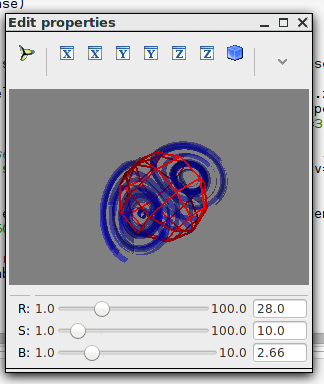

In [19]:
from IPython.display import Image
Image(filename='images/lorenz_mayavi.png') 